### Carga de datos, etc


In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

from skimage import io, color, transform
from skimage.feature import hog

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
gray_matrix = np.load('DatosDF\gray_matrix.npy', allow_pickle=True)
pca = np.load('DatosDF\pca.npy', allow_pickle=True)
estados = np.load('DatosDF\estados.npy', allow_pickle=True)
label = np.load('DatosDF\labels.npy', allow_pickle=True)

In [3]:
df = pd.DataFrame({'gray_matrix': gray_matrix,'pca': pca,'estados': estados,'label': label})

In [4]:
dfxusar = df[df['estados'] == 1]
elresto = df[df['estados'] == 0]
dfxusar

,gray_matrix,pca,estados,label
16,"[[175, 166, 185, 198, 202, 213, 212, 209, 210,...","[1.0912320462992262, 0.3657536288748723, 0.283...",1,angry
23,"[[26, 29, 30, 35, 45, 60, 108, 145, 161, 161, ...","[-0.7706739587282956, 0.721693515528713, 1.215...",1,angry
30,"[[17, 18, 19, 19, 17, 15, 16, 17, 18, 20, 18, ...","[0.7941313890964633, -0.6699144967452324, 0.43...",1,angry
31,"[[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 13, 37, ...","[1.5112234099411108, 1.0339331627332178, -0.16...",1,angry
45,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...","[1.0902360530996267, 0.01650497232340127, -0.2...",1,angry
...,...,...,...,...
35863,"[[9, 38, 69, 99, 86, 102, 111, 105, 65, 58, 64...","[-0.5491822800503183, 0.37287554580139537, 0.5...",1,surprise
35869,"[[253, 253, 254, 253, 170, 101, 105, 102, 85, ...","[-0.831189505684772, -0.9824639195355812, -0.5...",1,surprise
35875,"[[252, 247, 146, 93, 94, 89, 99, 94, 93, 83, 9...","[-1.6612481070642713, -0.7122384048718365, 0.9...",1,surprise
35878,"[[33, 44, 49, 40, 35, 28, 23, 14, 9, 16, 17, 5...","[0.4970099444085885, -0.026777335969787118, 0....",1,surprise


In [5]:
X = np.array(dfxusar['pca'].values.tolist())
y = dfxusar['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19011)

In [6]:
l=y.unique().tolist()
l

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

## Redes Neuronales

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(400,400),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=0.2,
                    learning_rate='constant',
                    max_iter=10000,
                    tol=1e-6,
                    verbose=True,
                    batch_size=16,
                    early_stopping=True,
                    validation_fraction=0.2,
                    momentum=0,
                    n_iter_no_change=25,
                    random_state=42)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.93800416
Validation score: 0.798103
Iteration 2, loss = 0.35897835
Validation score: 0.826558
Iteration 3, loss = 0.11040731
Validation score: 0.829268
Iteration 4, loss = 0.02986242
Validation score: 0.844173
Iteration 5, loss = 0.00728782
Validation score: 0.849593
Iteration 6, loss = 0.00341589
Validation score: 0.849593
Iteration 7, loss = 0.00246729
Validation score: 0.846883
Iteration 8, loss = 0.00193115
Validation score: 0.850949
Iteration 9, loss = 0.00158694
Validation score: 0.852304
Iteration 10, loss = 0.00134612
Validation score: 0.849593
Iteration 11, loss = 0.00116786
Validation score: 0.852304
Iteration 12, loss = 0.00103013
Validation score: 0.850949
Iteration 13, loss = 0.00091979
Validation score: 0.850949
Iteration 14, loss = 0.00083050
Validation score: 0.850949
Iteration 15, loss = 0.00075567
Validation score: 0.850949
Iteration 16, loss = 0.00069403
Validation score: 0.850949
Iteration 17, loss = 0.00064058
Validation score: 0.850949
Iterat

MLPClassifier(alpha=0, batch_size=16, early_stopping=True,
              hidden_layer_sizes=(400, 400), learning_rate_init=0.2,
              max_iter=10000, momentum=0, n_iter_no_change=25, random_state=42,
              solver='sgd', tol=1e-06, validation_fraction=0.2, verbose=True)

In [9]:
y_pred_e= mlp.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_e)
print(f'Precisión del modelo entrenamiento: {accuracy}')

print(classification_report(y_train, y_pred_e))

Precisión del modelo entrenamiento: 0.9704446854663774
              precision    recall  f1-score   support

       angry       0.97      0.96      0.96       462
     disgust       0.95      0.95      0.95       435
        fear       0.96      0.96      0.96       579
       happy       0.98      0.99      0.99       650
     neutral       0.99      0.98      0.98       622
         sad       0.95      0.96      0.95       467
    surprise       0.99      0.99      0.99       473

    accuracy                           0.97      3688
   macro avg       0.97      0.97      0.97      3688
weighted avg       0.97      0.97      0.97      3688



In [10]:
# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de tsteo: {accuracy}')

print(classification_report(y_test, y_pred))

Precisión del modelo de tsteo: 0.8483206933911159
              precision    recall  f1-score   support

       angry       0.78      0.79      0.79       101
     disgust       0.72      0.70      0.71       112
        fear       0.82      0.85      0.83       156
       happy       0.95      0.97      0.96       149
     neutral       0.89      0.90      0.89       153
         sad       0.81      0.77      0.79       119
    surprise       0.91      0.89      0.90       133

    accuracy                           0.85       923
   macro avg       0.84      0.84      0.84       923
weighted avg       0.85      0.85      0.85       923



## [Conjunto Pequeño] GridSearch - Optimizacion de parametros

### Primero

In [7]:

mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='logistic',
                    solver='sgd',
                    alpha=0,
                    learning_rate='constant',
                    max_iter=10000,
                    tol=1e-4,
                    verbose=True,
                    momentum=0,
                    n_iter_no_change=25,
                    random_state=42)

param_grid = {
    'learning_rate_init': [0.2,0.1,0.01],
    'batch_size': [32,128,512],
    'activation' : ['identity', 'tanh', 'relu'],
    'hidden_layer_sizes' : [(200,), (410,), (821,), (200, 200), (410, 410), (821, 821)]
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10,n_jobs=-1,return_train_score = True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Iteration 1, loss = 1.05381611
Iteration 2, loss = 0.46020375
Iteration 3, loss = 0.22281059
Iteration 4, loss = 0.08840029
Iteration 5, loss = 0.03365202
Iteration 6, loss = 0.01415782
Iteration 7, loss = 0.01140020
Iteration 8, loss = 0.00641934
Iteration 9, loss = 0.00488138
Iteration 10, loss = 0.00397018
Iteration 11, loss = 0.00332076
Iteration 12, loss = 0.00285353
Iteration 13, loss = 0.00248640
Iteration 14, loss = 0.00221436
Iteration 15, loss = 0.00198592
Iteration 16, loss = 0.00180091
Iteration 17, loss = 0.00164246
Iteration 18, loss = 0.00150956
Iteration 19, loss = 0.00139394
Iteration 20, loss = 0.00129506
Iteration 21, loss = 0.00120888
Iteration 22, loss = 0.00113127
Iteration 23, loss = 0.00106218
Iteration 24, loss = 0.00100051
Iteration 25, loss = 0.00094530
Iteration 26, loss = 0.00089645
Iteration 27, loss = 0.00085088
Iteration 28, loss = 0.00080975
Iteration 29, loss = 0.00077279
Iteration 30, loss

**Resultados** 

Precisión del modelo: 0.8483206933911159
- 'activation': 'relu', 
- 'batch_size': 32, 
- 'hidden_layer_sizes': (410,410), 
- 'learning_rate_init': 0.2

In [8]:
results = grid_search.cv_results_
acc_e =[]
acc_t=[]
n_nnn=[]
i=1
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    acc_e.append(mean_train_score)
    acc_t.append(mean_test_score)
    n_nnn.append(i)
    print(f"Mean train score: {mean_train_score:.3f}, Mean test score: {mean_test_score:.3f} with parameters: {params}")
    i=i+2

Mean train score: 1.000, Mean test score: 0.806 with parameters: {'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.2}
Mean train score: 1.000, Mean test score: 0.807 with parameters: {'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.1}
Mean train score: 1.000, Mean test score: 0.808 with parameters: {'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.01}
Mean train score: 1.000, Mean test score: 0.803 with parameters: {'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': (410,), 'learning_rate_init': 0.2}
Mean train score: 1.000, Mean test score: 0.802 with parameters: {'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': (410,), 'learning_rate_init': 0.1}
Mean train score: 1.000, Mean test score: 0.806 with parameters: {'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': (410,), 'learning_rate_init': 0.

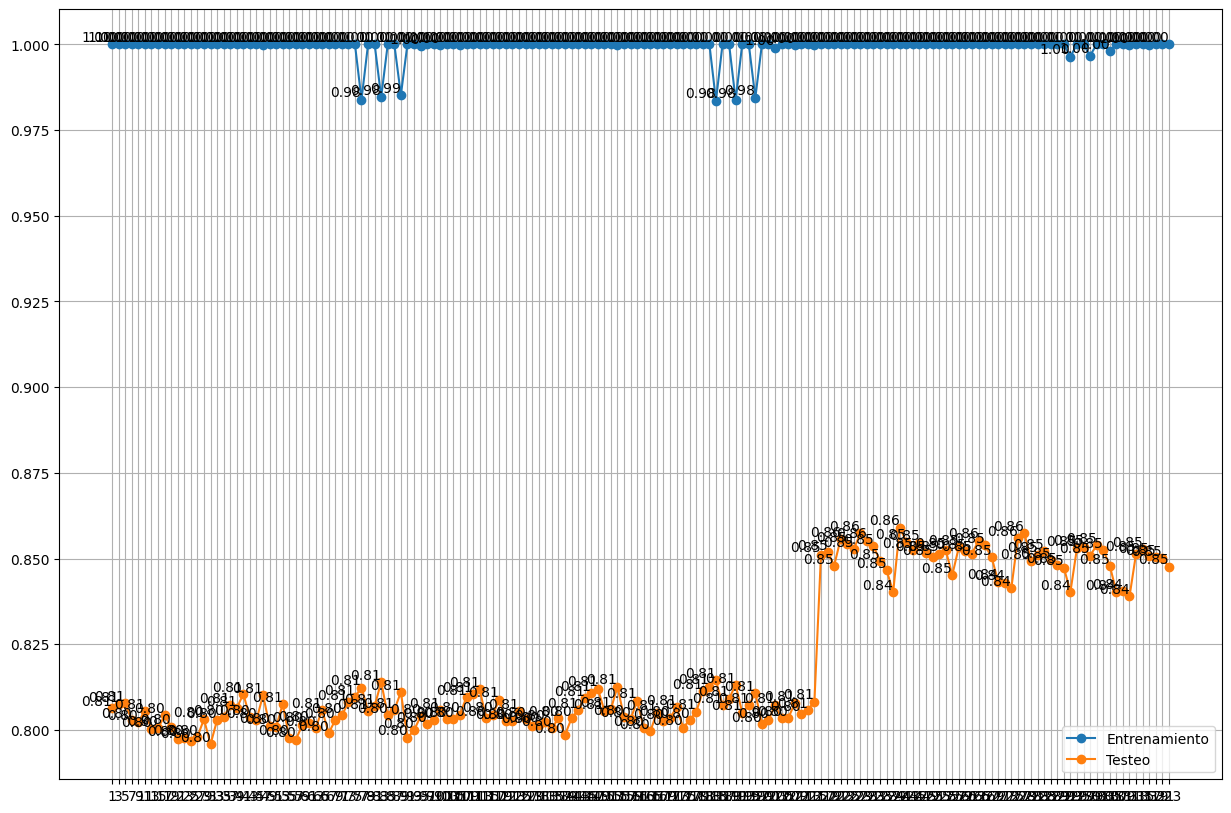

In [9]:
plt.figure(figsize=(15, 10))

plt.plot(acc_e, label='Entrenamiento', marker='o')
plt.plot(acc_t, label='Testeo', marker='o')

plt.xticks(range(len(n_nnn)), n_nnn)  # Set custom x-axis ticks and labels

for i, (x, ye, yt) in enumerate(zip(range(len(n_nnn)), acc_e, acc_t)):
    plt.text(x, ye, f'{ye:.2f}', ha='right', va='bottom')  # Training accuracy tag
    plt.text(x, yt, f'{yt:.2f}', ha='right', va='bottom')  # Testing accuracy tag

plt.legend()
plt.grid()
plt.show()

Dumpeo del grid search

In [10]:
from joblib import dump
joblib_filename = 'grid_search_1_MLP.joblib'
dump(grid_search, joblib_filename)

['grid_search_1_MLP.joblib']

### Segundo

In [7]:

mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='logistic',
                    solver='sgd',
                    alpha=0,
                    learning_rate='constant',
                    max_iter=10000,
                    tol=1e-4,
                    verbose=True,
                    momentum=0,
                    n_iter_no_change=25,
                    early_stopping=True,
                    validation_fraction=0.2,
                    random_state=42)

param_grid = {
    'learning_rate_init': [0.2,0.15,0.1],
    'batch_size': [16,32],
    'activation' : ['relu'],
    'hidden_layer_sizes' : [(300,), (400,), (300, 300), (400, 400)]
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10,n_jobs=-1,return_train_score = True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 1, loss = 0.93800416
Validation score: 0.798103
Iteration 2, loss = 0.35897835
Validation score: 0.826558
Iteration 3, loss = 0.11040731
Validation score: 0.829268
Iteration 4, loss = 0.02986242
Validation score: 0.844173
Iteration 5, loss = 0.00728782
Validation score: 0.849593
Iteration 6, loss = 0.00341589
Validation score: 0.849593
Iteration 7, loss = 0.00246729
Validation score: 0.846883
Iteration 8, loss = 0.00193115
Validation score: 0.850949
Iteration 9, loss = 0.00158694
Validation score: 0.852304
Iteration 10, loss = 0.00134612
Validation score: 0.849593
Iteration 11, loss = 0.00116786
Validation score: 0.852304
Iteration 12, loss = 0.00103013
Validation score: 0.850949
Iteration 13, loss = 0.00091979
Validation score: 0.850949
Iteration 14, loss = 0.00083050
Validation score: 0.850949
Iteration 15, loss = 0.00075567
Validation score: 0.850949
Iteration 16, loss = 0.00069403
Validation score: 0.850949
Ite

### Resultado

- activation: 'relu'
- batch_size: 16
- hidden layer sizes: (400,400)
- learning rate init: 0.2

In [7]:
from joblib import load

joblib_filename = 'grid_search_2_MLP.joblib'
grid_search = load(joblib_filename)### Segundo

### Tercero

In [9]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='logistic',
                    solver='sgd',
                    alpha=0,
                    learning_rate='constant',
                    max_iter=10000,
                    tol=1e-4,
                    verbose=True,
                    momentum=0,
                    n_iter_no_change=25,
                    early_stopping=True,
                    validation_fraction=0.2,
                    random_state=42)

param_grid = {
    'learning_rate_init': [0.2],
    'batch_size': [16],
    'activation' : ['relu'],
    'hidden_layer_sizes' : [(200,), (300, 200),(300, 400),(200, 300), (200, 400),(400, 300),(400, 200)]
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10,n_jobs=-1,return_train_score = True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Iteration 1, loss = 0.94942830
Validation score: 0.787263
Iteration 2, loss = 0.33704689
Validation score: 0.806233
Iteration 3, loss = 0.11307737
Validation score: 0.842818
Iteration 4, loss = 0.02502075
Validation score: 0.848238
Iteration 5, loss = 0.01018128
Validation score: 0.852304
Iteration 6, loss = 0.00806790
Validation score: 0.860434
Iteration 7, loss = 0.00481522
Validation score: 0.860434
Iteration 8, loss = 0.00208662
Validation score: 0.861789
Iteration 9, loss = 0.00166606
Validation score: 0.863144
Iteration 10, loss = 0.00139644
Validation score: 0.863144
Iteration 11, loss = 0.00119997
Validation score: 0.860434
Iteration 12, loss = 0.00105372
Validation score: 0.861789
Iteration 13, loss = 0.00093668
Validation score: 0.860434
Iteration 14, loss = 0.00084275
Validation score: 0.861789
Iteration 15, loss = 0.00076630
Validation score: 0.863144
Iteration 16, loss = 0.00070137
Validation score: 0.863144
Itera

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(400,300),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate='constant',
                    max_iter=10000,
                    batch_size=16,
                    learning_rate_init=0.15,
                    tol=1e-4,
                    verbose=True,
                    momentum=0,
                    n_iter_no_change=25,
                    random_state=42)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.94282861
Iteration 2, loss = 0.35417245
Iteration 3, loss = 0.13334869
Iteration 4, loss = 0.03681688
Iteration 5, loss = 0.01147199
Iteration 6, loss = 0.00592187
Iteration 7, loss = 0.00582720
Iteration 8, loss = 0.00289225
Iteration 9, loss = 0.00235759
Iteration 10, loss = 0.00191680
Iteration 11, loss = 0.00163616
Iteration 12, loss = 0.00143221
Iteration 13, loss = 0.00126924
Iteration 14, loss = 0.00113792
Iteration 15, loss = 0.00103222
Iteration 16, loss = 0.00094206
Iteration 17, loss = 0.00086628
Iteration 18, loss = 0.00080147
Iteration 19, loss = 0.00074479
Iteration 20, loss = 0.00069519
Iteration 21, loss = 0.00065109
Iteration 22, loss = 0.00061249
Iteration 23, loss = 0.00057781
Iteration 24, loss = 0.00054703
Iteration 25, loss = 0.00051864
Iteration 26, loss = 0.00049270
Iteration 27, loss = 0.00047000
Iteration 28, loss = 0.00044862
Iteration 29, loss = 0.00042894
Iteration 30, loss = 0.00041072
Iteration 31, loss = 0.00039408
Iteration 32, los

MLPClassifier(alpha=0, batch_size=16, hidden_layer_sizes=(400, 300),
              learning_rate_init=0.15, max_iter=10000, momentum=0,
              n_iter_no_change=25, random_state=42, solver='sgd', verbose=True)

In [14]:
y_pred_e= mlp.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_e)
print(f'Precisión del modelo entrenamiento: {accuracy}')

print(classification_report(y_train, y_pred_e))

Precisión del modelo entrenamiento: 1.0
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       462
     disgust       1.00      1.00      1.00       435
        fear       1.00      1.00      1.00       579
       happy       1.00      1.00      1.00       650
     neutral       1.00      1.00      1.00       622
         sad       1.00      1.00      1.00       467
    surprise       1.00      1.00      1.00       473

    accuracy                           1.00      3688
   macro avg       1.00      1.00      1.00      3688
weighted avg       1.00      1.00      1.00      3688



In [15]:
# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de tsteo: {accuracy}')

print(classification_report(y_test, y_pred))

Precisión del modelo de tsteo: 0.8548212351029253
              precision    recall  f1-score   support

       angry       0.77      0.81      0.79       101
     disgust       0.78      0.64      0.71       112
        fear       0.82      0.86      0.84       156
       happy       0.96      0.98      0.97       149
     neutral       0.90      0.93      0.91       153
         sad       0.77      0.77      0.77       119
    surprise       0.92      0.91      0.92       133

    accuracy                           0.85       923
   macro avg       0.85      0.84      0.84       923
weighted avg       0.85      0.85      0.85       923



## Matrices y busqueda de parametros individuales

In [56]:
mlp = MLPClassifier(hidden_layer_sizes=(300,),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate='constant',
                    max_iter=10000,
                    batch_size=16,
                    learning_rate_init=0.15,
                    tol=1e-4,
                    verbose=True,
                    momentum=0,
                    n_iter_no_change=25,
                    random_state=42)

In [57]:
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_train)
accuracy_score(y_train,y_pred)

Iteration 1, loss = 0.95921247
Iteration 2, loss = 0.44066798
Iteration 3, loss = 0.25712642
Iteration 4, loss = 0.14973229
Iteration 5, loss = 0.08518617
Iteration 6, loss = 0.04990018
Iteration 7, loss = 0.03391675
Iteration 8, loss = 0.02453073
Iteration 9, loss = 0.01921886
Iteration 10, loss = 0.01560127
Iteration 11, loss = 0.01312965
Iteration 12, loss = 0.01119905
Iteration 13, loss = 0.00982656
Iteration 14, loss = 0.00869265
Iteration 15, loss = 0.00778938
Iteration 16, loss = 0.00706435
Iteration 17, loss = 0.00644578
Iteration 18, loss = 0.00589459
Iteration 19, loss = 0.00546088
Iteration 20, loss = 0.00507544
Iteration 21, loss = 0.00472908
Iteration 22, loss = 0.00443170
Iteration 23, loss = 0.00416309
Iteration 24, loss = 0.00392385
Iteration 25, loss = 0.00370387
Iteration 26, loss = 0.00351511
Iteration 27, loss = 0.00333645
Iteration 28, loss = 0.00317935
Iteration 29, loss = 0.00303352
Iteration 30, loss = 0.00289916
Iteration 31, loss = 0.00277526
Iteration 32, los

1.0

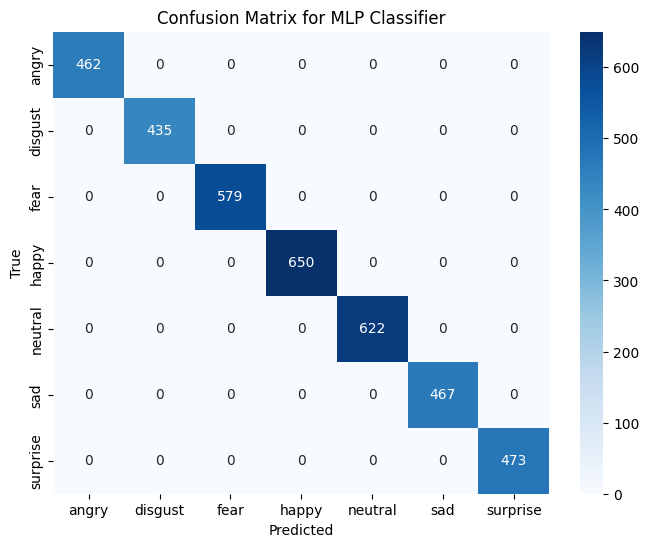

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create a confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=y.unique().tolist(), yticklabels=y.unique().tolist())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

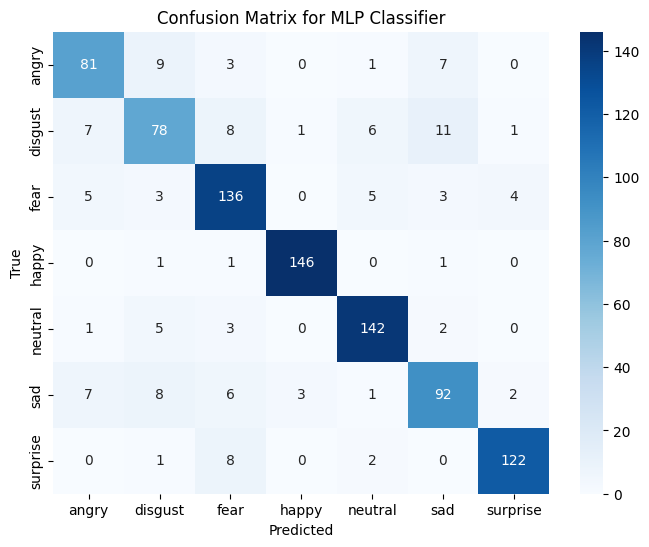

0.8634886240520043

In [59]:
y_pred = mlp.predict(X_test)
accuracy_score(y_test,y_pred)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=y.unique().tolist(), yticklabels=y.unique().tolist())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()
accuracy_score(y_test,y_pred)

In [47]:
acc_e=[]
acc_t=[]
valores=[0.5,0.3,0.2,0.15,0.1,0.05,0.01]
for i,x in enumerate(valores):
    mlp = MLPClassifier(hidden_layer_sizes=(1,),
                        activation='relu',
                        solver='sgd',
                        alpha=0,
                        learning_rate='constant',
                        max_iter=10000,
                        learning_rate_init=x,
                        #batch_size=32,
                        tol=1e-4,
                        verbose=True,
                        momentum=0,
                        n_iter_no_change=25,
                        random_state=42)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_train)
    y_pred_t = mlp.predict(X_test)
    acc_e.append(accuracy_score(y_train,y_pred))
    acc_t.append(accuracy_score(y_test,y_pred_t))

Iteration 1, loss = 1.83190270
Iteration 2, loss = 1.64052803
Iteration 3, loss = 1.58365496
Iteration 4, loss = 1.55530529
Iteration 5, loss = 1.53704132
Iteration 6, loss = 1.52246759
Iteration 7, loss = 1.51073568
Iteration 8, loss = 1.49961858
Iteration 9, loss = 1.48935918
Iteration 10, loss = 1.47766602
Iteration 11, loss = 1.46596891
Iteration 12, loss = 1.45223391
Iteration 13, loss = 1.43826794
Iteration 14, loss = 1.42426061
Iteration 15, loss = 1.41073685
Iteration 16, loss = 1.39758987
Iteration 17, loss = 1.38500689
Iteration 18, loss = 1.37488071
Iteration 19, loss = 1.36186204
Iteration 20, loss = 1.35354595
Iteration 21, loss = 1.34538753
Iteration 22, loss = 1.33904436
Iteration 23, loss = 1.33207730
Iteration 24, loss = 1.32503712
Iteration 25, loss = 1.31842050
Iteration 26, loss = 1.31188540
Iteration 27, loss = 1.30550143
Iteration 28, loss = 1.30119743
Iteration 29, loss = 1.29631304
Iteration 30, loss = 1.29081770
Iteration 31, loss = 1.28523162
Iteration 32, los

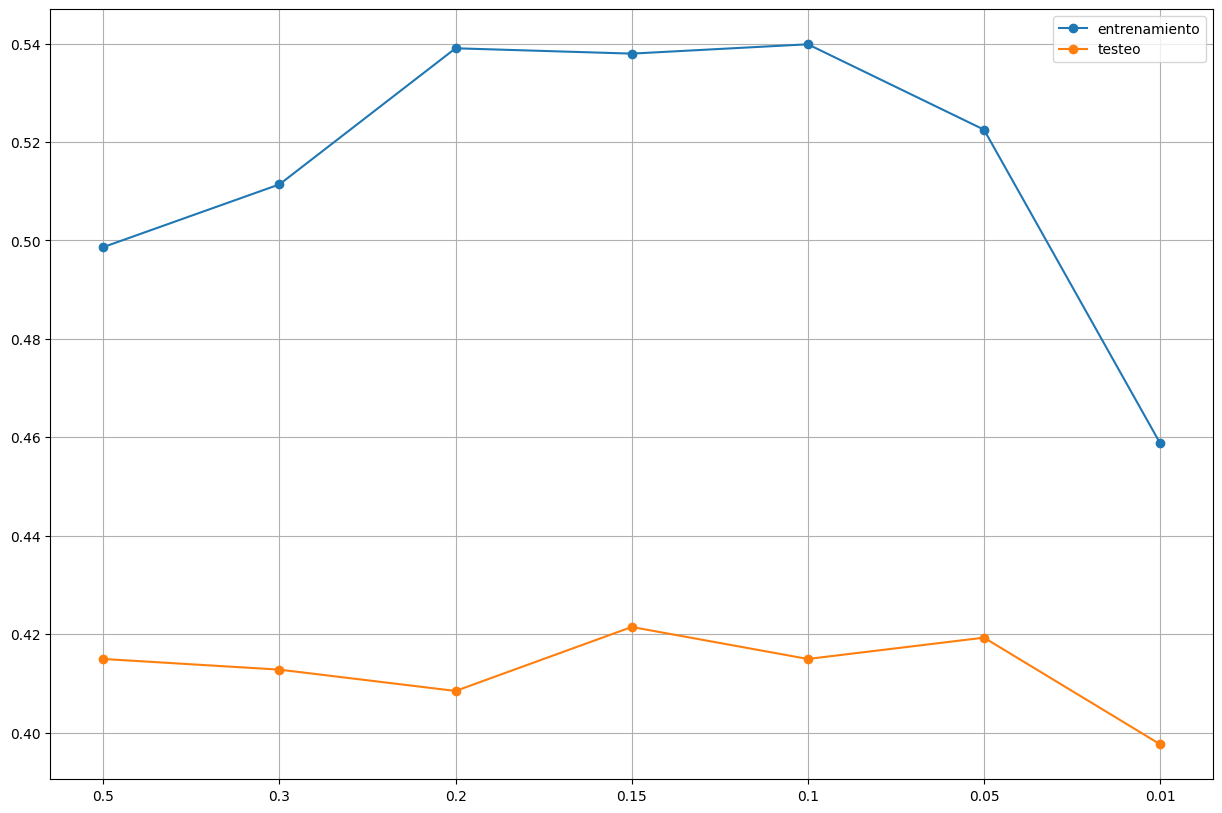

In [48]:
plt.figure(figsize=(15,10))
plt.plot(acc_e,label='entrenamiento',marker='o')
plt.plot(acc_t,label='testeo',marker='o')
plt.xticks(range(len(valores)),valores)
plt.grid()
plt.legend()
plt.show()

In [49]:
acc_e=[]
acc_t=[]
valores=[200,300,410,500,600]
for i,x in enumerate(valores):
    mlp = MLPClassifier(hidden_layer_sizes=(x,),
                        activation='relu',
                        solver='sgd',
                        alpha=0,
                        learning_rate='constant',
                        max_iter=10000,
                        learning_rate_init=0.1,
                        #batch_size=32,
                        tol=1e-4,
                        verbose=True,
                        momentum=0,
                        n_iter_no_change=25,
                        random_state=42)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_train)
    y_pred_t = mlp.predict(X_test)
    acc_e.append(accuracy_score(y_train,y_pred))
    acc_t.append(accuracy_score(y_test,y_pred_t))

Iteration 1, loss = 1.83577581
Iteration 2, loss = 1.56948748
Iteration 3, loss = 1.34935453
Iteration 4, loss = 1.17635365
Iteration 5, loss = 1.04579813
Iteration 6, loss = 0.94621252
Iteration 7, loss = 0.86862730
Iteration 8, loss = 0.80685401
Iteration 9, loss = 0.75477849
Iteration 10, loss = 0.71060514
Iteration 11, loss = 0.67182140
Iteration 12, loss = 0.63788447
Iteration 13, loss = 0.60747594
Iteration 14, loss = 0.57959110
Iteration 15, loss = 0.55462568
Iteration 16, loss = 0.53138838
Iteration 17, loss = 0.50949527
Iteration 18, loss = 0.48913165
Iteration 19, loss = 0.47040569
Iteration 20, loss = 0.45224397
Iteration 21, loss = 0.43566574
Iteration 22, loss = 0.41988719
Iteration 23, loss = 0.40452720
Iteration 24, loss = 0.39028519
Iteration 25, loss = 0.37641133
Iteration 26, loss = 0.36358605
Iteration 27, loss = 0.35133089
Iteration 28, loss = 0.33925083
Iteration 29, loss = 0.32800373
Iteration 30, loss = 0.31700133
Iteration 31, loss = 0.30655045
Iteration 32, los

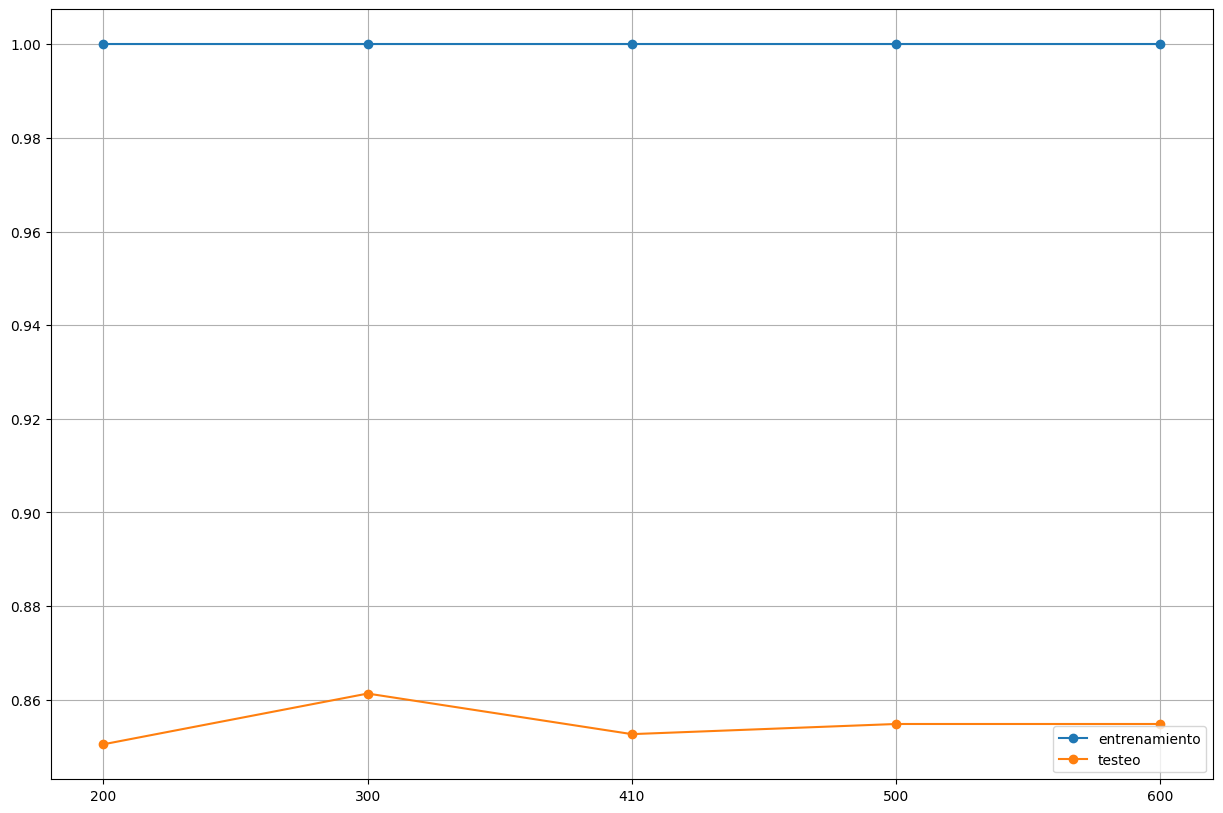

In [50]:
plt.figure(figsize=(15,10))
plt.plot(acc_e,label='entrenamiento',marker='o')
plt.plot(acc_t,label='testeo',marker='o')
plt.xticks(range(len(valores)),valores)
plt.grid()
plt.legend()
plt.show()

In [52]:
acc_e=[]
acc_t=[]
valores=[(100,),(100,100),(100,100,100),(100,100,100,100)]
for i,x in enumerate(valores):
    mlp = MLPClassifier(hidden_layer_sizes=x,
                        activation='relu',
                        solver='sgd',
                        alpha=0,
                        learning_rate='constant',
                        max_iter=10000,
                        learning_rate_init=0.1,
                        #batch_size=32,
                        tol=1e-4,
                        verbose=True,
                        momentum=0,
                        n_iter_no_change=25,
                        random_state=42)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_train)
    y_pred_t = mlp.predict(X_test)
    acc_e.append(accuracy_score(y_train,y_pred))
    acc_t.append(accuracy_score(y_test,y_pred_t))

Iteration 1, loss = 1.83091625
Iteration 2, loss = 1.57590636
Iteration 3, loss = 1.35355651
Iteration 4, loss = 1.17527326
Iteration 5, loss = 1.04083746
Iteration 6, loss = 0.93909310
Iteration 7, loss = 0.86064989
Iteration 8, loss = 0.79826913
Iteration 9, loss = 0.74670164
Iteration 10, loss = 0.70227995
Iteration 11, loss = 0.66434136
Iteration 12, loss = 0.63048401
Iteration 13, loss = 0.60029250
Iteration 14, loss = 0.57270290
Iteration 15, loss = 0.54757174
Iteration 16, loss = 0.52432639
Iteration 17, loss = 0.50323669
Iteration 18, loss = 0.48338107
Iteration 19, loss = 0.46458273
Iteration 20, loss = 0.44716285
Iteration 21, loss = 0.43068360
Iteration 22, loss = 0.41522572
Iteration 23, loss = 0.40057807
Iteration 24, loss = 0.38675253
Iteration 25, loss = 0.37380680
Iteration 26, loss = 0.36100242
Iteration 27, loss = 0.34882763
Iteration 28, loss = 0.33752156
Iteration 29, loss = 0.32667640
Iteration 30, loss = 0.31615942
Iteration 31, loss = 0.30594023
Iteration 32, los

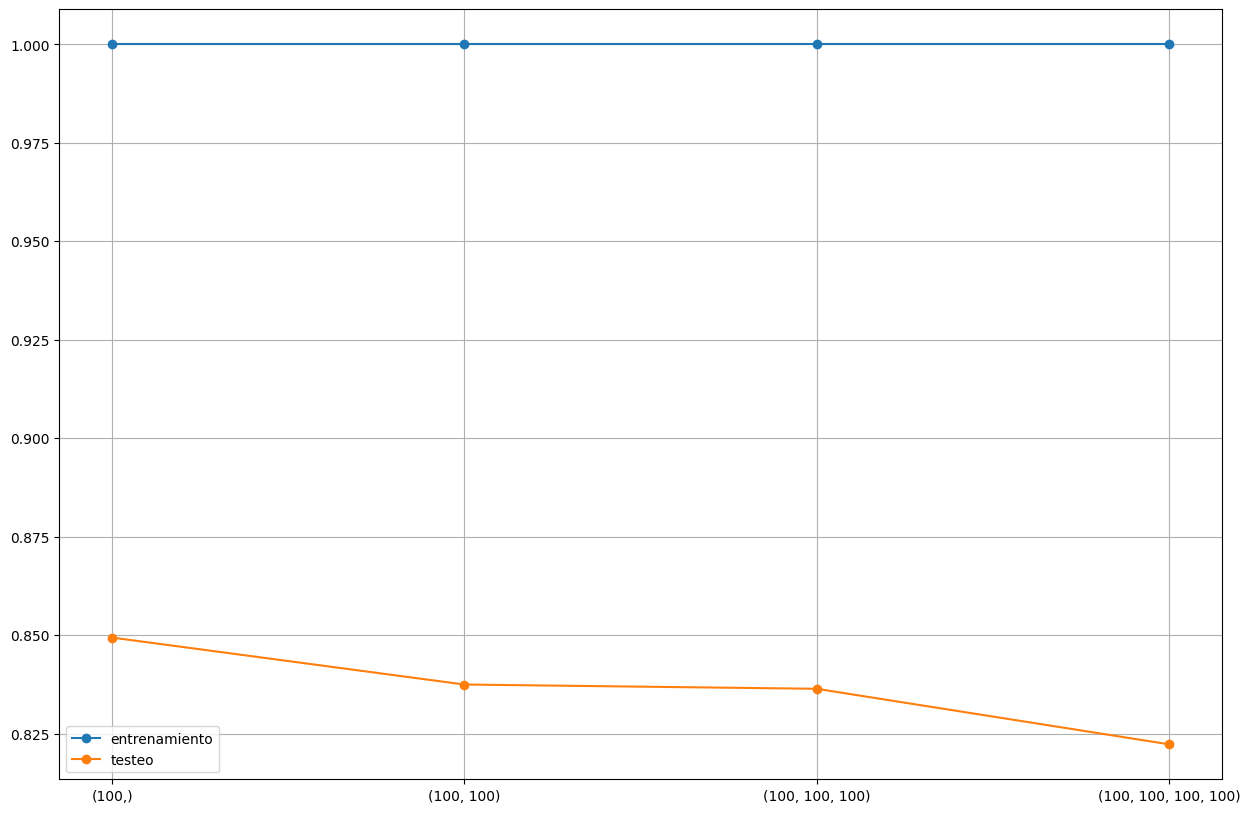

In [53]:
plt.figure(figsize=(15,10))
plt.plot(acc_e,label='entrenamiento',marker='o')
plt.plot(acc_t,label='testeo',marker='o')
plt.xticks(range(len(valores)),valores)
plt.grid()
plt.legend()
plt.show()

In [54]:
acc_e=[]
acc_t=[]
valores=[8,16,32,64,128,256,512]
for i,x in enumerate(valores):
    mlp = MLPClassifier(hidden_layer_sizes=(1,),
                        activation='relu',
                        solver='sgd',
                        alpha=0,
                        learning_rate='constant',
                        max_iter=10000,
                        learning_rate_init=0.1,
                        batch_size=x,
                        tol=1e-4,
                        verbose=True,
                        momentum=0,
                        n_iter_no_change=25,
                        random_state=42)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_train)
    y_pred_t = mlp.predict(X_test)
    acc_e.append(accuracy_score(y_train,y_pred))
    acc_t.append(accuracy_score(y_test,y_pred_t))

Iteration 1, loss = 1.64732840
Iteration 2, loss = 1.52027778
Iteration 3, loss = 1.47989673
Iteration 4, loss = 1.43363536
Iteration 5, loss = 1.39340906
Iteration 6, loss = 1.36572590
Iteration 7, loss = 1.34607224
Iteration 8, loss = 1.32699005
Iteration 9, loss = 1.31353018
Iteration 10, loss = 1.30223442
Iteration 11, loss = 1.29202874
Iteration 12, loss = 1.27750762
Iteration 13, loss = 1.26952038
Iteration 14, loss = 1.26909429
Iteration 15, loss = 1.26189066
Iteration 16, loss = 1.25505168
Iteration 17, loss = 1.24940478
Iteration 18, loss = 1.24139431
Iteration 19, loss = 1.23775291
Iteration 20, loss = 1.23445204
Iteration 21, loss = 1.23545354
Iteration 22, loss = 1.22735270
Iteration 23, loss = 1.22306023
Iteration 24, loss = 1.22255008
Iteration 25, loss = 1.21919753
Iteration 26, loss = 1.21541583
Iteration 27, loss = 1.21185156
Iteration 28, loss = 1.20919573
Iteration 29, loss = 1.20842743
Iteration 30, loss = 1.20421156
Iteration 31, loss = 1.20319303
Iteration 32, los

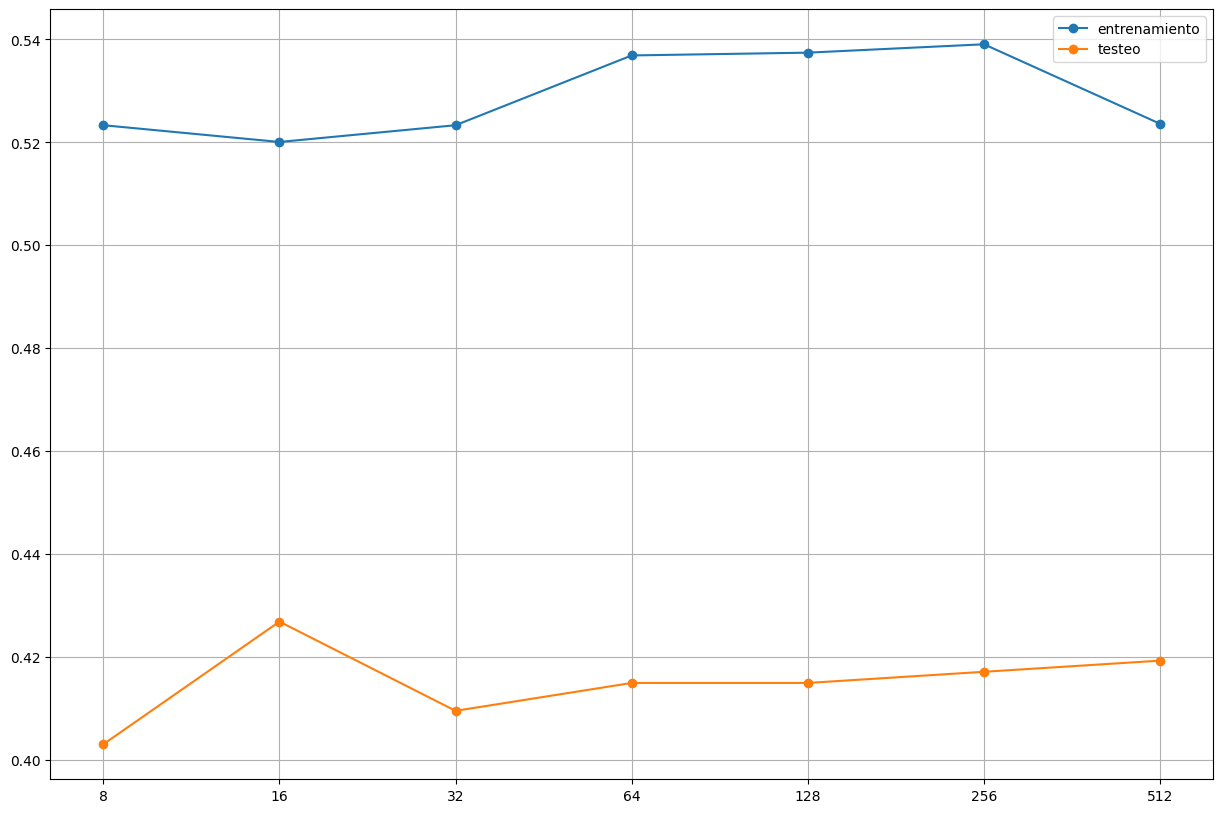

In [55]:
plt.figure(figsize=(15,10))
plt.plot(acc_e,label='entrenamiento',marker='o')
plt.plot(acc_t,label='testeo',marker='o')
plt.xticks(range(len(valores)),valores)
plt.grid()
plt.legend()
plt.show()